In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('TRAIN.csv')

In [3]:
data.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.drop('fnlwgt',axis=1,inplace=True
         )

In [5]:
#We will fill null values with highest mode values

data.isnull().sum()

Age                  0
Workclass         2079
Education            0
Education_Num        0
Martial_Status       0
Occupation        2087
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            656
Target               0
dtype: int64

In [6]:
data['Workclass'].describe()

count        34448
unique           8
top        Private
freq         25441
Name: Workclass, dtype: object

In [7]:
data['Worlclass']=data['Workclass'].fillna('Private')


In [8]:
data['Occupation'].describe()

count               34440
unique                 14
top        Prof-specialty
freq                 4642
Name: Occupation, dtype: object

In [9]:
data['Occupation']=data['Occupation'].fillna('Prof-specialty')

In [10]:
data=data.dropna()

In [11]:
data.isnull().sum().sum()

0

In [12]:
y=data['Target']
x=data.drop('Target',axis=1)

In [13]:
y.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [14]:
y=y.replace(' <=50K',0)
y=y.replace(' <=50K.',0)
y=y.replace(' >50K',1)
y=y.replace(' >50K.',1)

In [15]:
y.unique()

array([0, 1], dtype=int64)

In [16]:
x=pd.get_dummies(x)

In [17]:
x.head()

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Vietnam,Country_ Yugoslavia,Worlclass_ Federal-gov,Worlclass_ Local-gov,Worlclass_ Never-worked,Worlclass_ Private,Worlclass_ Self-emp-inc,Worlclass_ Self-emp-not-inc,Worlclass_ State-gov,Worlclass_ Without-pay
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
#Clustering requires standardisation to be performed since we calculate euclidean distance
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sc=StandardScaler()
sc_data=sc.fit_transform(x)
sc_data=pd.DataFrame(sc_data)
#sc_data.columns=data.columns

C:\Users\hp user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp user\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
sc_data.columns=x.columns

In [20]:
sc_data.head()

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Country_ Vietnam,Country_ Yugoslavia,Worlclass_ Federal-gov,Worlclass_ Local-gov,Worlclass_ Never-worked,Worlclass_ Private,Worlclass_ Self-emp-inc,Worlclass_ Self-emp-not-inc,Worlclass_ State-gov,Worlclass_ Without-pay
0,0.038996,1.127775,0.146219,-0.218624,-0.077637,-0.180221,-0.271562,-0.015381,-1.680467,-0.192288,...,-0.046187,-0.022425,-0.180221,-0.271562,-0.015381,-1.680467,-0.192288,-0.300309,4.759459,-0.021755
1,0.874784,1.127775,-0.147847,-0.218624,-2.332587,-0.180221,-0.271562,-0.015381,-1.680467,-0.192288,...,-0.046187,-0.022425,-0.180221,-0.271562,-0.015381,-1.680467,-0.192288,3.329907,-0.210108,-0.021755
2,-0.036985,-0.439709,-0.147847,-0.218624,-0.077637,-0.180221,-0.271562,-0.015381,0.595073,-0.192288,...,-0.046187,-0.022425,-0.180221,-0.271562,-0.015381,0.595073,-0.192288,-0.300309,-0.210108,-0.021755
3,1.102727,-1.223452,-0.147847,-0.218624,-0.077637,-0.180221,-0.271562,-0.015381,0.595073,-0.192288,...,-0.046187,-0.022425,-0.180221,-0.271562,-0.015381,0.595073,-0.192288,-0.300309,-0.210108,-0.021755
4,-0.796793,1.127775,-0.147847,-0.218624,-0.077637,-0.180221,-0.271562,-0.015381,0.595073,-0.192288,...,-0.046187,-0.022425,-0.180221,-0.271562,-0.015381,0.595073,-0.192288,-0.300309,-0.210108,-0.021755


In [21]:
from sklearn.cluster import KMeans
mod_clust=KMeans(n_clusters=2)
mod_clust.fit(sc_data)
grp=mod_clust.predict(sc_data)

In [22]:
list(grp)

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [23]:
from sklearn import metrics
metrics.adjusted_rand_score(y, grp)

0.16118353668258792

In [24]:
#Silhoutee score(value ranges from -1 to +1)
from sklearn.metrics import silhouette_score
sc=silhouette_score(sc_data,grp)

In [25]:
sc

0.057930020079638746

In [26]:
mod_clust.inertia_

3688199.2270843396

In [27]:
#Silhoutte score of 1 is more ideal and zero indicates the datum on border of clusters.
#Check below for different k values for the score.
from sklearn.metrics import silhouette_score
k=[2,3,4,5,8]
clust_err=[]
for i in k:
    mod=KMeans(i,random_state=0)
    modfit=mod.fit(sc_data)
    L=modfit.predict(sc_data)
    score=silhouette_score(sc_data,L)
    t=mod.inertia_
    clust_err.append(t)
    print("the silhouette score for {} cluster is {},{}".format(i,score,t))

the silhouette score for 2 cluster is 0.05791843957971766,3688198.3103624587
the silhouette score for 3 cluster is 0.0394363330890333,3599178.3375857314
the silhouette score for 4 cluster is 0.045193631929947825,3520083.64601104
the silhouette score for 5 cluster is 0.05828727932561365,3452413.5778025757
the silhouette score for 8 cluster is 0.035983763278377004,3261205.478243653


In [28]:
from sklearn.decomposition import PCA
pcamod=PCA(6)
pca_data=pcamod.fit_transform(sc_data)

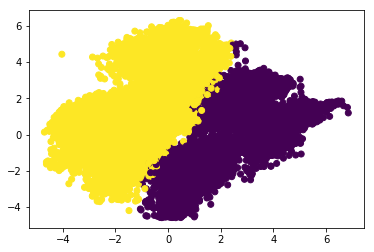

In [29]:
#Below shows for two clusters after applying dimensionality reduction
plt.scatter(pca_data[:,0],pca_data[:,1],c=grp)

In [ ]:
#Since the data set is huge 35000 data points it is not practical to perform hierarchial clustering